In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading in data. Data was pulled from the toRvik package in R
data = pd.read_csv("toRvik_dfs.csv")
data.head()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,41,43,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,type,did_win,game_id,Unnamed: 4,team,conf,opp,opp_conf,min,...,bench_pts,pts_tov,biggest_lead_score,biggest_lead,biggest_run_score,biggest_run,lead_changes,time_leading,quad_game,year
0,3/12/23,conf_t,0,Texas A&MAlabama3-12,NaN,Texas A&M,SEC,Alabama,SEC,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/12/23,conf_t,1,Texas A&MAlabama3-12,NaN,Alabama,SEC,Texas A&M,SEC,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/12/23,conf_t,0,YalePrinceton3-12,NaN,Yale,Ivy,Princeton,Ivy,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/12/23,conf_t,1,YalePrinceton3-12,NaN,Princeton,Ivy,Yale,Ivy,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/12/23,conf_t,0,DaytonVCU3-12,NaN,Dayton,A10,VCU,A10,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [3]:
# Dropping unnecessary columns
df = data.drop(["location","second_chance_pts","second_chance_fgm","second_chance_fga","second_change_fg_pct",
                "pts_in_paint","pts_in_paint_fgm","pts_in_paint_fga","pts_in_paint_fg_pct","fast_brk_pts",
                "fast_brk_fgm","fast_brk_fga","fast_brk_fg_pct","bench_pts","pts_tov","biggest_lead_score",
                "biggest_lead","biggest_run_score","biggest_run","lead_changes", "time_leading","quad_game",
                "conf", "opp", "opp_conf", "Unnamed: 4", "min", "date", "type", "game_id", "team"],
                axis = 1)
df.head()

,did_win,pos,fgm,fga,tpm,tpa,ftm,fta,oreb,dreb,reb,ast,stl,blk,to,pf,pts,year
0,0,68.4250,19.0,64.0,5.0,15.0,20.0,24.0,19.0,20.0,39.0,6.0,5.0,2.0,13.0,21.0,63,NaN
1,1,68.4250,27.0,66.0,12.0,36.0,16.0,22.0,21.0,29.0,50.0,16.0,6.0,7.0,12.0,19.0,82,NaN
2,0,62.7125,22.0,50.0,8.0,22.0,13.0,19.0,6.0,25.0,31.0,12.0,3.0,7.0,10.0,20.0,65,NaN
3,1,62.7125,23.0,57.0,9.0,23.0,19.0,24.0,11.0,25.0,36.0,11.0,3.0,2.0,5.0,18.0,74,NaN
4,0,57.0000,18.0,56.0,3.0,22.0,17.0,20.0,16.0,22.0,38.0,11.0,1.0,6.0,8.0,21.0,56,NaN


In [4]:
# Checking column names
df.columns

Index(['did_win', 'pos', 'fgm', 'fga', 'tpm', 'tpa', 'ftm', 'fta', 'oreb',
       'dreb', 'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'pts', 'year'],
      dtype='object')

In [5]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175948 entries, 0 to 175947
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   did_win  175948 non-null  int64  
 1   pos      175948 non-null  float64
 2   fgm      175900 non-null  float64
 3   fga      175900 non-null  float64
 4   tpm      175900 non-null  float64
 5   tpa      175900 non-null  float64
 6   ftm      175900 non-null  float64
 7   fta      175900 non-null  float64
 8   oreb     175900 non-null  float64
 9   dreb     175900 non-null  float64
 10  reb      175900 non-null  float64
 11  ast      175900 non-null  float64
 12  stl      175900 non-null  float64
 13  blk      175900 non-null  float64
 14  to       175900 non-null  float64
 15  pf       175900 non-null  float64
 16  pts      175948 non-null  int64  
 17  year     163732 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 24.2 MB


In [6]:
# Filling in "year" null values with 2023. All null values in that column come from the 2022-2023 season
df["year"].fillna(2023, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175948 entries, 0 to 175947
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   did_win  175948 non-null  int64  
 1   pos      175948 non-null  float64
 2   fgm      175900 non-null  float64
 3   fga      175900 non-null  float64
 4   tpm      175900 non-null  float64
 5   tpa      175900 non-null  float64
 6   ftm      175900 non-null  float64
 7   fta      175900 non-null  float64
 8   oreb     175900 non-null  float64
 9   dreb     175900 non-null  float64
 10  reb      175900 non-null  float64
 11  ast      175900 non-null  float64
 12  stl      175900 non-null  float64
 13  blk      175900 non-null  float64
 14  to       175900 non-null  float64
 15  pf       175900 non-null  float64
 16  pts      175948 non-null  int64  
 17  year     175948 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 24.2 MB


In [7]:
# Changing year to int64
df["year"].astype("int64")

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
175943    2008
175944    2008
175945    2008
175946    2008
175947    2008
Name: year, Length: 175948, dtype: int64

In [8]:
# Round possessions to a whole number
df["pos"] = round(df["pos"], 0)

In [9]:
# Filling in fgm, fga, tpm, tpa, ftm, fta, oreb, dreb, reb, ast, stl, blk, to, pf with mean values
df[["fgm","fga","tpm","tpa","ftm","fta","oreb","dreb","reb","ast","stl","blk","to","pf"]] = df[["fgm","fga","tpm","tpa","ftm","fta","oreb","dreb","reb",
                                                                                                "ast","stl","blk","to","pf"]].fillna(df[["fgm","fga","tpm","tpa","ftm"
                                                                                                                                         ,"fta","oreb","dreb","reb","ast",
                                                                                                                                         "stl","blk","to","pf"]].mean())


In [10]:
# df info after filling in null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175948 entries, 0 to 175947
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   did_win  175948 non-null  int64  
 1   pos      175948 non-null  float64
 2   fgm      175948 non-null  float64
 3   fga      175948 non-null  float64
 4   tpm      175948 non-null  float64
 5   tpa      175948 non-null  float64
 6   ftm      175948 non-null  float64
 7   fta      175948 non-null  float64
 8   oreb     175948 non-null  float64
 9   dreb     175948 non-null  float64
 10  reb      175948 non-null  float64
 11  ast      175948 non-null  float64
 12  stl      175948 non-null  float64
 13  blk      175948 non-null  float64
 14  to       175948 non-null  float64
 15  pf       175948 non-null  float64
 16  pts      175948 non-null  int64  
 17  year     175948 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 24.2 MB


In [11]:
# Dataframe description
df.describe()

,did_win,pos,fgm,fga,tpm,tpa,ftm,fta,oreb,dreb,reb,ast,stl,blk,to,pf,pts,year
count,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000,175948.000000
mean,0.500000,67.987724,24.655861,56.455543,6.850233,19.983053,13.795804,19.709687,10.548658,24.243377,34.780608,12.985190,6.376163,3.338755,13.175941,18.137806,69.958420,2015.598586
std,0.500001,6.526865,5.028462,7.590981,3.070005,6.125792,6.078470,7.888082,4.119837,5.225685,6.805570,4.471554,2.943848,2.270864,4.179892,4.487833,12.816826,4.611510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,0.000000,64.000000,21.000000,51.000000,5.000000,16.000000,9.000000,14.000000,8.000000,21.000000,30.000000,10.000000,4.000000,2.000000,10.000000,15.000000,61.000000,2012.000000
50%,0.500000,68.000000,24.000000,56.000000,7.000000,20.000000,13.000000,19.000000,10.000000,24.000000,34.000000,13.000000,6.000000,3.000000,13.000000,18.000000,70.000000,2016.000000
75%,1.000000,72.000000,28.000000,61.000000,9.000000,24.000000,18.000000,25.000000,13.000000,28.000000,39.000000,16.000000,8.000000,5.000000,16.000000,21.000000,78.000000,2020.000000
max,1.000000,118.000000,77.000000,108.000000,28.000000,74.000000,50.000000,67.000000,38.000000,106.000000,113.000000,57.000000,31.000000,18.000000,47.000000,59.000000,177.000000,2023.000000


In [12]:
# Correlations
df.corr()

,did_win,pos,fgm,fga,tpm,tpa,ftm,fta,oreb,dreb,reb,ast,stl,blk,to,pf,pts,year
did_win,1.000000e+00,-7.468093e-17,0.383279,-0.055637,0.197245,-0.059113,0.298359,0.268429,-0.004810,0.404298,0.307621,0.382698,0.168176,0.209437,-0.163496,-0.237627,0.489546,-1.792090e-15
pos,-7.468093e-17,1.000000e+00,0.426012,0.563683,0.153091,0.234239,0.313914,0.341791,0.125732,0.373657,0.363507,0.222063,0.282402,0.105601,0.351233,0.334586,0.519953,1.600360e-01
fgm,3.832786e-01,4.260125e-01,1.000000,0.547439,0.398961,0.168840,-0.029885,-0.039772,0.106812,0.277428,0.277607,0.655366,0.178969,0.132404,-0.181289,-0.009614,0.865929,1.260300e-01
fga,-5.563733e-02,5.636829e-01,0.547439,1.000000,0.207387,0.425188,-0.156902,-0.151141,0.551750,0.190288,0.479729,0.260566,0.199977,0.072107,-0.233377,0.099241,0.404883,1.588115e-01
tpm,1.972454e-01,1.530906e-01,0.398961,0.207387,1.000000,0.702226,-0.113462,-0.145783,-0.088363,0.086018,0.012659,0.505904,0.010385,-0.009797,-0.104452,-0.025985,0.498807,1.533958e-01
tpa,-5.911296e-02,2.342389e-01,0.168840,0.425188,0.702226,1.000000,-0.178824,-0.202938,0.099366,0.059078,0.105678,0.267114,0.041731,-0.041958,-0.122666,0.011957,0.215924,2.447928e-01
ftm,2.983586e-01,3.139142e-01,-0.029885,-0.156902,-0.113462,-0.178824,1.000000,0.927246,0.080345,0.178534,0.185749,-0.017664,0.077820,0.093053,0.018955,0.221574,0.423586,-7.838879e-02
fta,2.684294e-01,3.417906e-01,-0.039772,-0.151141,-0.145783,-0.202938,0.927246,1.000000,0.140405,0.188092,0.229480,-0.030252,0.100092,0.108032,0.044710,0.257229,0.373583,-1.148271e-01
oreb,-4.810484e-03,1.257323e-01,0.106812,0.551750,-0.088363,0.099366,0.080345,0.140405,1.000000,0.047943,0.641500,0.005780,0.107847,0.092819,0.056849,0.089373,0.100754,-1.293936e-01
dreb,4.042977e-01,3.736573e-01,0.277428,0.190288,0.086018,0.059078,0.178534,0.188092,0.047943,1.000000,0.793071,0.231368,-0.088200,0.264724,0.099874,-0.044155,0.322982,1.473423e-01


<AxesSubplot:>

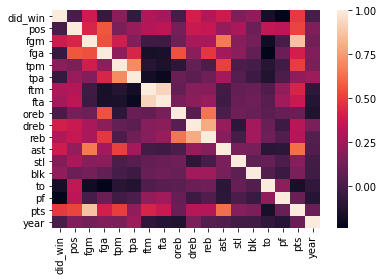

In [13]:
# Correlation heat map
sns.heatmap(df.corr())

# Feature Engineering

In [14]:
# Adding field goald percentage, three point percentage, effective field goal percentage, free throw percentage,
# turnover percentage, True shooting attempts, True shooting percentage, and Free throw rate
df["fg%"] = round((df["fgm"]/df["fga"])*100,2)
df["3fg%"] = round((df["tpm"]/df["tpa"])*100,2)
df["efg%"] = round(((df["fgm"] + 0.5 * df["tpm"])/df["fga"]) *100, 2)
df["ft%"] = round((df["ftm"]/df["fta"])*100,2)
df["to%"] = round((100 * df["to"])/(df["fga"] + 0.44 * df["fta"] + df["to"]),2)
df["tsa"] = round(df["fga"] + 0.44 * df["fta"], 2)
df["ts%"] = round(df["pts"]/(2* df["tsa"]),2)
df["ftr"] = round(df["fta"]/df["fga"],2)

In [15]:
df.head()

,did_win,pos,fgm,fga,tpm,tpa,ftm,fta,oreb,dreb,...,pts,year,fg%,3fg%,efg%,ft%,to%,tsa,ts%,ftr
0,0,68.0,19.0,64.0,5.0,15.0,20.0,24.0,19.0,20.0,...,63,2023.0,29.69,33.33,33.59,83.33,14.85,74.56,0.42,0.38
1,1,68.0,27.0,66.0,12.0,36.0,16.0,22.0,21.0,29.0,...,82,2023.0,40.91,33.33,50.00,72.73,13.69,75.68,0.54,0.33
2,0,63.0,22.0,50.0,8.0,22.0,13.0,19.0,6.0,25.0,...,65,2023.0,44.00,36.36,52.00,68.42,14.63,58.36,0.56,0.38
3,1,63.0,23.0,57.0,9.0,23.0,19.0,24.0,11.0,25.0,...,74,2023.0,40.35,39.13,48.25,79.17,6.89,67.56,0.55,0.42
4,0,57.0,18.0,56.0,3.0,22.0,17.0,20.0,16.0,22.0,...,56,2023.0,32.14,13.64,34.82,85.00,10.99,64.80,0.43,0.36


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175948 entries, 0 to 175947
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   did_win  175948 non-null  int64  
 1   pos      175948 non-null  float64
 2   fgm      175948 non-null  float64
 3   fga      175948 non-null  float64
 4   tpm      175948 non-null  float64
 5   tpa      175948 non-null  float64
 6   ftm      175948 non-null  float64
 7   fta      175948 non-null  float64
 8   oreb     175948 non-null  float64
 9   dreb     175948 non-null  float64
 10  reb      175948 non-null  float64
 11  ast      175948 non-null  float64
 12  stl      175948 non-null  float64
 13  blk      175948 non-null  float64
 14  to       175948 non-null  float64
 15  pf       175948 non-null  float64
 16  pts      175948 non-null  int64  
 17  year     175948 non-null  float64
 18  fg%      175946 non-null  float64
 19  3fg%     175946 non-null  float64
 20  efg%     175946 non-null  

In [17]:
df["fg%"].fillna(df["fg%"].mean(), inplace = True)
df["3fg%"].fillna(df["3fg%"].mean(), inplace = True)
df["efg%"].fillna(df["efg%"].mean(), inplace = True)
df["ft%"].fillna(df["ft%"].mean(), inplace = True)
df["to%"].fillna(df["to%"].mean(), inplace = True)
df["ts%"].fillna(df["ts%"].mean(), inplace = True)
df["ftr"].fillna(df["ftr"].mean(), inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175948 entries, 0 to 175947
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   did_win  175948 non-null  int64  
 1   pos      175948 non-null  float64
 2   fgm      175948 non-null  float64
 3   fga      175948 non-null  float64
 4   tpm      175948 non-null  float64
 5   tpa      175948 non-null  float64
 6   ftm      175948 non-null  float64
 7   fta      175948 non-null  float64
 8   oreb     175948 non-null  float64
 9   dreb     175948 non-null  float64
 10  reb      175948 non-null  float64
 11  ast      175948 non-null  float64
 12  stl      175948 non-null  float64
 13  blk      175948 non-null  float64
 14  to       175948 non-null  float64
 15  pf       175948 non-null  float64
 16  pts      175948 non-null  int64  
 17  year     175948 non-null  float64
 18  fg%      175948 non-null  float64
 19  3fg%     175948 non-null  float64
 20  efg%     175948 non-null  

# Modeling

Models used include boosted decision tree, random forest, SVM, logistic regression, and K-nearest neighbor

Boosted decision tree/Random Forest

In [19]:
# setting seed
import random
random.seed(101) 

In [20]:
# Assigning x and y
y = df["did_win"]
X = df.drop("did_win", axis = 1)

In [21]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Initial decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8009639211585241

In [ ]:
# Confusion matrix for initial decision tree
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
# Classification report for initial decision tree
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
hyperparameter_space = {'criterion':['gini', 'entropy'],
                        'max_depth':range(1,10), 
                        'min_samples_leaf': range(2,10),
                        'min_samples_split':range(1,5)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(clf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

In [ ]:
rs.fit(X_train, y_train)

In [ ]:
rs.best_estimator_

In [ ]:
rs.best_score_

In [27]:
# Boosted tree model
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=200)
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.8826471457476073

In [28]:
feature_names = df.columns
sorted(zip(boost.feature_importances_, feature_names), reverse=True)

[(0.4760913490063985, 'tsa'),
 (0.1397366320761073, 'dreb'),
 (0.10541531606086088, 'oreb'),
 (0.06670077370449147, 'to'),
 (0.060690057624244655, 'ast'),
 (0.04577360119207203, 'did_win'),
 (0.039586694612091716, 'blk'),
 (0.018368613029231345, 'ts%'),
 (0.009915028513283406, 'tpa'),
 (0.007218902898890743, 'pf'),
 (0.006537033526552951, 'ftm'),
 (0.006181477282738852, 'year'),
 (0.006171054501446295, 'reb'),
 (0.005801615232348668, 'stl'),
 (0.0022279844586584204, 'ft%'),
 (0.0014065232735041846, 'tpm'),
 (0.0012801222649908444, 'pts'),
 (0.00036610396347237236, '3fg%'),
 (0.0003572823184351209, 'fg%'),
 (8.376938930962983e-05, 'fgm'),
 (4.851224691416478e-05, 'to%'),
 (1.809730947293156e-05, 'efg%'),
 (1.017339813726264e-05, 'pos'),
 (7.051646185345934e-06, 'fga'),
 (6.230470160883894e-06, 'fta')]

Text(33.0, 0.5, 'True')

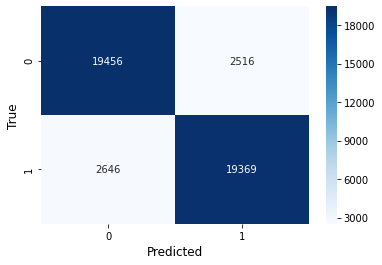

In [30]:
# Confusion matrix for boosted tree
from sklearn.metrics import confusion_matrix
y_pred = boost.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [31]:
# Classification report for boosted tree
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     21972
           1       0.89      0.88      0.88     22015

    accuracy                           0.88     43987
   macro avg       0.88      0.88      0.88     43987
weighted avg       0.88      0.88      0.88     43987



In [ ]:
rs_boost = RandomizedSearchCV(boost, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

In [ ]:
rs_boost.fit(X_train, y_train)

In [ ]:
rs_boost.best_estimator_

In [ ]:
rs_boost.best_score_

In [32]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8723031804851433

In [33]:
# Finding most important features
feature_names = df.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12320878635408698, 'tsa'),
 (0.08583901839577063, 'oreb'),
 (0.07720041012482395, 'year'),
 (0.07187230076065738, 'dreb'),
 (0.06805564253032145, 'pf'),
 (0.057804375439528634, '3fg%'),
 (0.05664251864520861, 'to'),
 (0.04793136890830145, 'ast'),
 (0.04204495713780473, 'did_win'),
 (0.034571781186537545, 'ft%'),
 (0.032420112153169804, 'reb'),
 (0.031226564867933907, 'tpa'),
 (0.02860898268572722, 'ts%'),
 (0.02778846788726638, 'blk'),
 (0.02669923818913465, 'fg%'),
 (0.024261241126834143, 'ftm'),
 (0.02246706595005327, 'to%'),
 (0.020947504739988257, 'efg%'),
 (0.019467385849031606, 'fgm'),
 (0.018729420154139684, 'tpm'),
 (0.01822081964590174, 'fta'),
 (0.01807089493472073, 'stl'),
 (0.017201089610191355, 'pts'),
 (0.016342385473999358, 'pos'),
 (0.012377667248866395, 'fga')]

Text(33.0, 0.5, 'True')

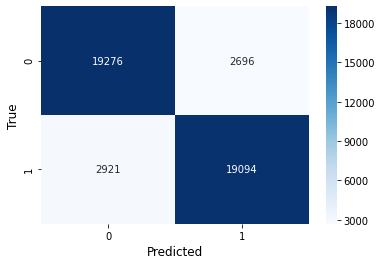

In [34]:
# Confusion matrix for random forest
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [35]:
# Classification report for random forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     21972
           1       0.88      0.87      0.87     22015

    accuracy                           0.87     43987
   macro avg       0.87      0.87      0.87     43987
weighted avg       0.87      0.87      0.87     43987



In [ ]:
rs_rf = RandomizedSearchCV(rf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

In [ ]:
rs_rf.fit(X_train, y_train)

In [ ]:
rs_rf.best_estimator_

In [ ]:
rs_rf.best_score_

Logistic Regression

In [36]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Model score
classifier.score(X_train, y_train)

0.8850114806647419

Text(33.0, 0.5, 'True')

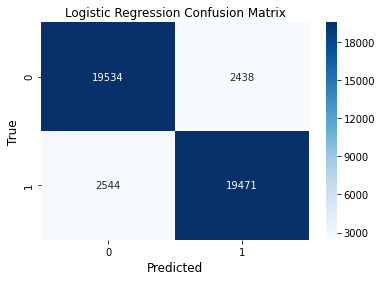

In [41]:
# Confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [39]:
# Classification report for Logistic Regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     21972
           1       0.89      0.88      0.89     22015

    accuracy                           0.89     43987
   macro avg       0.89      0.89      0.89     43987
weighted avg       0.89      0.89      0.89     43987

